In [2]:
# Standard MuJoCo initialization
!pip install mujoco

# Set up GPU rendering.
from google.colab import files
import distutils.util
import os
import subprocess
if subprocess.run('nvidia-smi').returncode:
  raise RuntimeError(
      'Cannot communicate with GPU. '
      'Make sure you are using a GPU Colab runtime. '
      'Go to the Runtime menu and select Choose runtime type.')

# Add an ICD config so that glvnd can pick up the Nvidia EGL driver.
# This is usually installed as part of an Nvidia driver package, but the Colab
# kernel doesn't install its driver via APT, and as a result the ICD is missing.
# (https://github.com/NVIDIA/libglvnd/blob/master/src/EGL/icd_enumeration.md)
NVIDIA_ICD_CONFIG_PATH = '/usr/share/glvnd/egl_vendor.d/10_nvidia.json'
if not os.path.exists(NVIDIA_ICD_CONFIG_PATH):
  with open(NVIDIA_ICD_CONFIG_PATH, 'w') as f:
    f.write("""{
    "file_format_version" : "1.0.0",
    "ICD" : {
        "library_path" : "libEGL_nvidia.so.0"
    }
}
""")

# Configure MuJoCo to use the EGL rendering backend (requires GPU)
print('Setting environment variable to use GPU rendering:')
%env MUJOCO_GL=egl

# Check if installation was succesful.
try:
  print('Checking that the installation succeeded:')
  import mujoco
  mujoco.MjModel.from_xml_string('<mujoco/>')
except Exception as e:
  raise e from RuntimeError(
      'Something went wrong during installation. Check the shell output above '
      'for more information.\n'
      'If using a hosted Colab runtime, make sure you enable GPU acceleration '
      'by going to the Runtime menu and selecting "Choose runtime type".')

print('Installation successful.')

# Other imports and helper functions
import time
import itertools
import numpy as np

# Graphics and plotting.
print('Installing mediapy:')
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
import mediapy as media
import matplotlib.pyplot as plt

# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

from IPython.display import clear_output
clear_output()

In [3]:
# Clone the MuJoCo Menagerie to fetch the models
!git clone https://github.com/google-deepmind/mujoco_menagerie.git

Cloning into 'mujoco_menagerie'...
remote: Enumerating objects: 1740, done.
remote: Counting objects: 100% (453/453), done.
remote: Compressing objects: 100% (290/290), done.
remote: Total 1740 (delta 235), reused 268 (delta 163), pack-reused 1287
Receiving objects: 100% (1740/1740), 160.09 MiB | 21.38 MiB/s, done.
Resolving deltas: 100% (744/744), done.
Updating files: 100% (868/868), done.


""

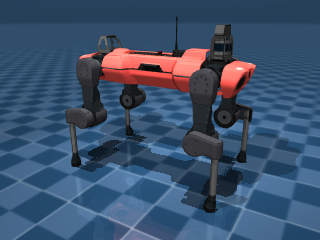

In [11]:
import mujoco

# Import model from MuJoCo Menagerie
# model = mujoco.MjModel.from_xml_path("mujoco_menagerie/unitree_a1/scene.xml")
# model = mujoco.MjModel.from_xml_path("mujoco_menagerie/unitree_a1/a1.xml")
# model = mujoco.MjModel.from_xml_path("mujoco_menagerie/anybotics_anymal_c/anymal_c.xml")
model = mujoco.MjModel.from_xml_path("mujoco_menagerie/anybotics_anymal_c/scene.xml")

# Render the model
data = mujoco.MjData(model)
# mujoco.mj_step(model, data)
renderer = mujoco.Renderer(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data)

# Display the image
media.show_image(renderer.render())